In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Importar os dados e vizualizar

In [2]:
data = pd.read_csv('data/cleaned_data.csv')

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,0.0,3,1.0,0,0,0,0,0,0,0,0,0,0,0,3
1,2.0,3,3.0,3,0,1,0,0,0,0,1,1,0,1,3
2,0.0,2,1.0,0,1,0,0,0,0,0,0,0,0,0,0
3,2.0,4,3.0,2,0,0,0,0,1,0,0,1,0,0,3
4,2.0,3,2.0,1,1,0,0,0,0,1,1,0,1,0,2


Separar os dados da resposta esperada pelos dados.

In [3]:
from sklearn.model_selection import train_test_split

targets = data['price']

#atributes = data.drop(['price'], axis=1)
#Tentando selecionar as features mais importantes vistas no feature_importance
attributes = data.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'], axis=1)


In [4]:
#Só dar uma olhada nos atributos selecionados:
attributes.describe()

,sqft_living,grade,zipcode
count,21603.000000,21603.000000,21603.000000
mean,1.504698,0.477526,1.493589
std,1.119229,0.499506,1.133564
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000
75%,3.000000,1.000000,3.000000
max,3.000000,1.000000,3.000000


Tentar encontrar a árvore de decisão com a profundidade ideal (parece que é 9). Para esse caso é considerado o test_size arbitrário de 25%, mas isso é mudado nas próximas células

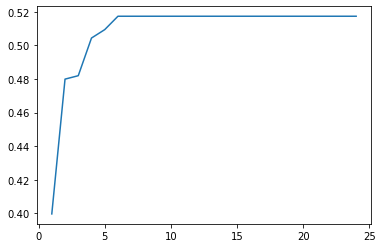

In [5]:
x_train, x_test, y_train, y_test = train_test_split(attributes, targets, test_size=0.25)

accuracy = []

depth = np.arange(1,25)

for d in depth:
    decision_tree = tree.DecisionTreeClassifier(max_depth = d)
    decision_tree.fit(x_train, y_train)
    
    y_pred = decision_tree.predict(x_test)

    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(depth, accuracy)

Agora mudando a produndidade e o número de dados usados para teste

In [6]:
size = np.arange(1,100)/100

depth = np.arange(1,25)

accuracy = []

for s in size:
    
    x_train, x_test, y_train, y_test = train_test_split(attributes, targets, test_size = s)

    depth_line = []
    
    
    for d in depth:
        decision_tree = tree.DecisionTreeClassifier(max_depth = d)
        decision_tree.fit(x_train, y_train)

        y_pred = decision_tree.predict(x_test)

        depth_line.append(accuracy_score(y_test, y_pred))
        #depth_line.append(d+s)

    accuracy.append(depth_line)

#plt.plot(depth, accuracy)

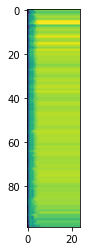

In [7]:
imgplot = plt.imshow(accuracy)

In [8]:
print(np.max(accuracy))

df = pd.DataFrame.from_records(accuracy)

#Só não estava conseguindo achar o índice do máximo

0.549239920687376
